In [6]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

In [8]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

In [9]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [10]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv')
df_seoul_business = pd.read_csv('df_seoul_business.csv')
df_seoul_people = pd.read_csv('df_seoul_people.csv')

In [14]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [16]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [18]:
df_seoul_bus_station.head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743


In [20]:
df_seoul_moving.head(3)

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80


In [22]:
df_seoul_business.head(3)

,자치구,한식 일반 음식점업,커피전문점,기타주점업
0,종로구,5912,3613,1413
1,중구,6414,3542,982
2,용산구,2987,2076,1332


In [24]:
df_seoul_people.head(3)

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823


In [26]:
data = pd.merge(standard, df_seoul_bus_station, on='자치구')
data = pd.merge(data, df_seoul_moving, on='자치구')
data = pd.merge(data, df_seoul_business, on='자치구')
data = pd.merge(data, df_seoul_people, on='자치구')

In [28]:
data.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,한식 일반 음식점업,커피전문점,기타주점업,남자,여자,합계
0,11010,종로구,359,107,6030756,5793573,136.745635,131.367580,58.194685,41.924669,28757369,20717410.80,5912,3613,1413,71654,78390,150044
1,11020,중구,172,102,4384564,4238810,132.192595,127.798179,56.495425,43.895374,28421662,22082840.96,6414,3542,982,63365,68392,131757
2,11030,용산구,325,70,4764100,4663071,136.082150,133.196350,57.799267,35.598387,26930239,16586249.44,2987,2076,1332,105480,113343,218823
3,11040,성동구,432,58,3185165,3134742,100.742164,99.147357,57.487400,40.110184,27346124,19079973.16,2785,1859,621,136779,146555,283334
4,11050,광진구,278,43,3207725,3228754,118.756247,119.534782,60.205262,44.344913,26680865,19652113.55,2861,1887,1577,166541,183141,349682


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   정류장수         25 non-null     int64  
 2   노선수          25 non-null     int64  
 3   승차총승객수       25 non-null     int64  
 4   하차총승객수       25 non-null     int64  
 5   승차평균승객수      25 non-null     float64
 6   하차평균승객수      25 non-null     float64
 7   평균 이동 시간(분)  25 non-null     float64
 8   이동인구(평균)     25 non-null     float64
 9   총 이동 시간      25 non-null     int64  
 10  총 이동인구       25 non-null     float64
 11  한식 일반 음식점업   25 non-null     int64  
 12  커피전문점        25 non-null     int64  
 13  기타주점업        25 non-null     int64  
 14  남자           25 non-null     int64  
 15  여자           25 non-null     int64  
 16  합계           25 non-null     int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 3.4+ KB


In [32]:
df = data.drop('도착 시군구 코드', axis=1)

In [61]:
df.rename(columns={'이동인구(합)':'이동인구(평균)'},inplace=True)
# 확인
df

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),총 이동 시간,총 이동인구,한식 일반 음식점업,커피전문점,기타주점업,남자,여자,합계
0,종로구,359,107,6030756,5793573,136.745635,131.367580,58.194685,41.924669,28757369,20717410.80,5912,3613,1413,71654,78390,150044
1,중구,172,102,4384564,4238810,132.192595,127.798179,56.495425,43.895374,28421662,22082840.96,6414,3542,982,63365,68392,131757
2,용산구,325,70,4764100,4663071,136.082150,133.196350,57.799267,35.598387,26930239,16586249.44,2987,2076,1332,105480,113343,218823
3,성동구,432,58,3185165,3134742,100.742164,99.147357,57.487400,40.110184,27346124,19079973.16,2785,1859,621,136779,146555,283334
4,광진구,278,43,3207725,3228754,118.756247,119.534782,60.205262,44.344913,26680865,19652113.55,2861,1887,1577,166541,183141,349682
5,동대문구,309,75,5887202,5770880,135.506192,132.828799,59.206579,39.150358,28168063,18626135.28,3566,1472,1082,173830,185713,359543
6,중랑구,384,50,4220995,4167084,83.242846,82.179660,62.806200,39.611742,25012883,15775574.40,2479,1037,1000,188685,197925,386610
7,성북구,596,100,6610774,6642472,116.676503,117.235955,59.975355,43.425861,28227521,20438468.24,2822,1384,1030,207616,228447,436063
8,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2663,1095,1275,139260,150567,289827
9,도봉구,366,57,3575712,3493061,110.579911,108.023905,66.683308,36.915026,22711868,12572999.34,2009,837,477,148622,159162,307784


### 1.단변량 분석
변수의 비즈니스 의미

숫자? 범주?

전처리 사항

NaN 존재 여부 및 조치 방안
가변수화 대상여부
기초통계량

분포

위 정보로부터 파악한 내용(비즈니스!) 정리

추가 분석해볼 사항 도출

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
plt.rcParams["figure.figsize"]=(18,12)

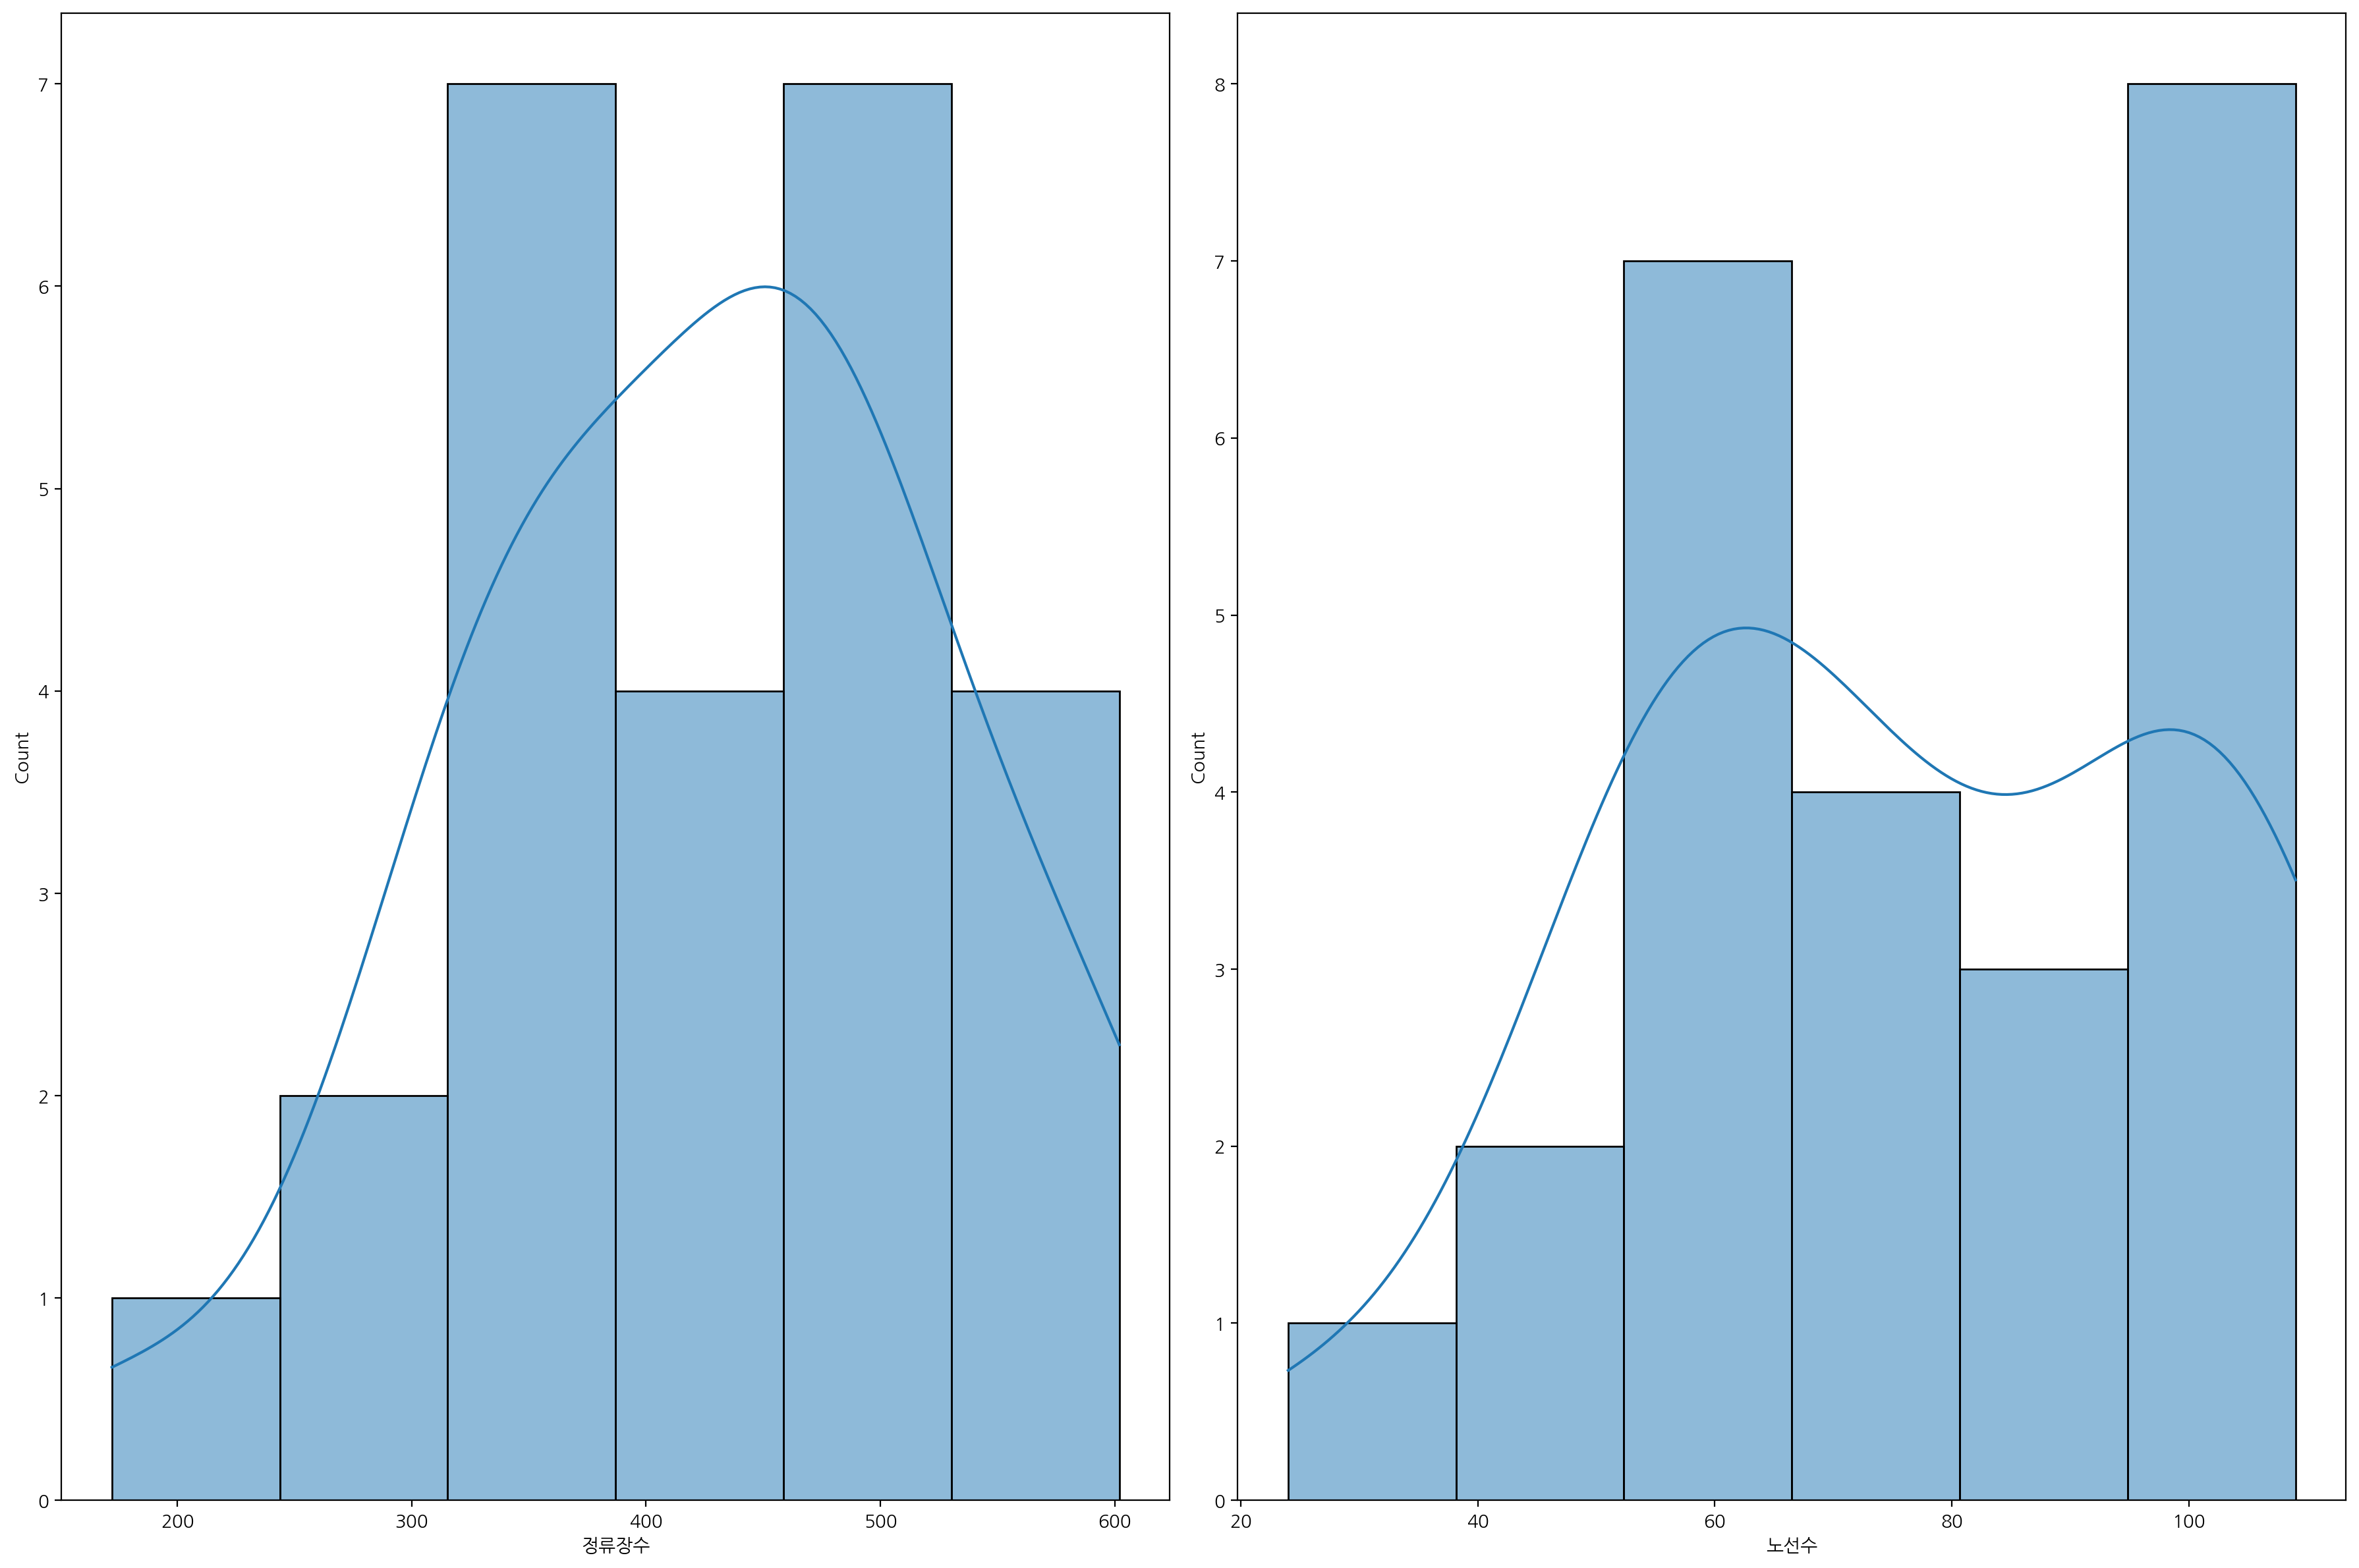

In [77]:
plt.subplot(1, 2, 1)
sns.histplot(df['정류장수'], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df['노선수'], kde=True)

plt.tight_layout()
plt.show()

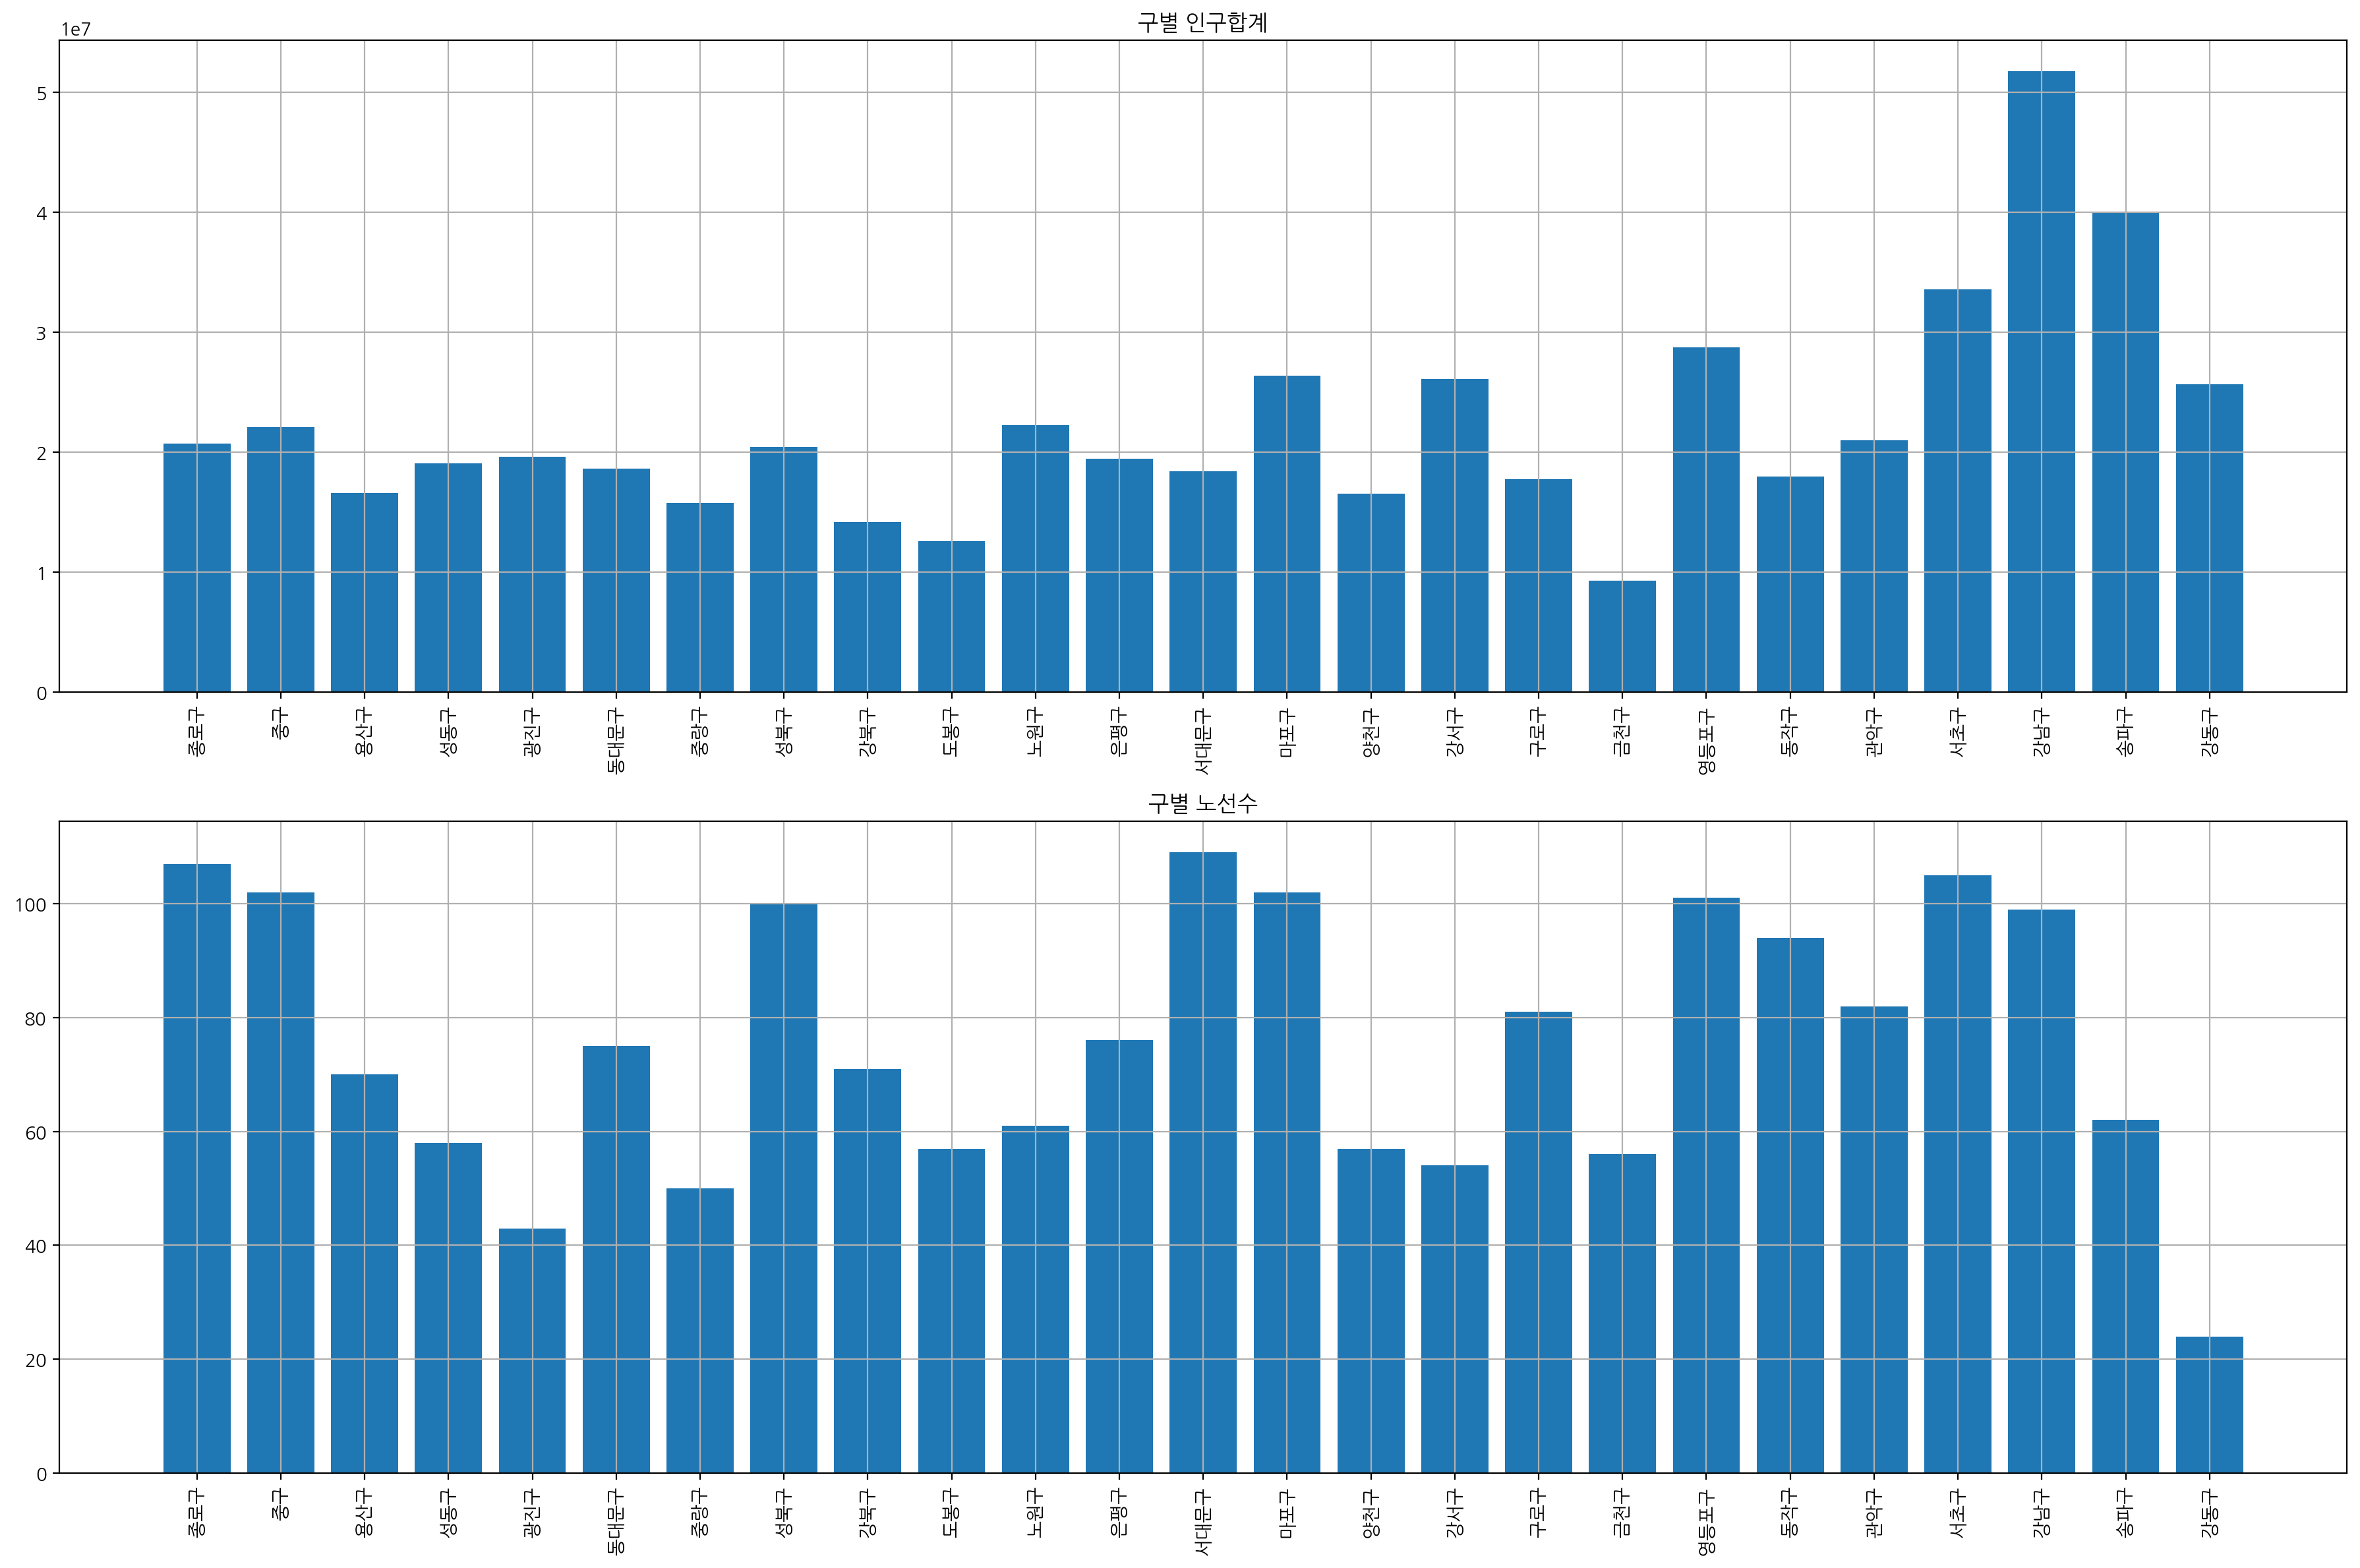

In [78]:

plt.subplot(2, 1, 1)
plt.bar(df['자치구'], df['총 이동인구'])
plt.xticks(rotation=90)
plt.title('구별 인구합계')
plt.grid()

plt.subplot(2, 1, 2)
plt.bar(df['자치구'], df['노선수'])
plt.xticks(rotation=90)
plt.title('구별 노선수')
plt.grid()

plt.tight_layout()
plt.show()